In [1]:
import pandas as pd
import os
import numpy as np
import sklearn

In [2]:
#Reading data as pandas dataframe
frame = pd.read_csv('C:/Users/MEHUL/Documents/fakenrealnews.csv')

#Inspecing Shape
frame.shape

#Inspecting top 5 rows
frame.head()

,Column1,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
y = frame.label
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [4]:
frame.drop("label", axis=1)
frame.head()

,Column1,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(frame['text'], y, test_size=0.33, random_state=53)

In [7]:
X_train.head()

5738    2013: 7,157 [4] \nVirtually no one in the Zion...
1605    Protests and vigils have erupted in major citi...
1644    Twitter brings out the best in nobody, and thi...
1185    Gay and lesbian couples could face legal chaos...
3473    A verdict in 2017 could have sweeping conseque...
Name: text, dtype: object

In [8]:
y_train.head()

5738    FAKE
1605    REAL
1644    REAL
1185    REAL
3473    REAL
Name: label, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

# Building Vectorizer Classifiers

## 1. By Using Count Vectorizer

In [10]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

## 2. By Using Tf-IDF Vectorizer

In [11]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [12]:
print(tfidf_test)

  (0, 55025)	0.05383827370290133
  (0, 54936)	0.039050735427209285
  (0, 54608)	0.07751996454356057
  (0, 54473)	0.2633275211002113
  (0, 53254)	0.031439406988856756
  (0, 53250)	0.26240241583139207
  (0, 53245)	0.03654606186769238
  (0, 53244)	0.02523233068397976
  (0, 51077)	0.030870246250316587
  (0, 50992)	0.065052796257125
  (0, 50832)	0.03470660226070492
  (0, 50775)	0.2203840370930644
  (0, 50122)	0.07204303167779663
  (0, 49918)	0.02523233068397976
  (0, 49798)	0.024932936945142224
  (0, 49526)	0.07555355648643286
  (0, 49090)	0.06417187270366519
  (0, 46976)	0.10066095271587847
  (0, 45153)	0.03484760410677524
  (0, 43995)	0.06403037485790664
  (0, 41728)	0.06880645166084794
  (0, 41724)	0.03248146832189595
  (0, 40520)	0.02526494691244166
  (0, 38023)	0.07204303167779663
  (0, 37281)	0.04248285730090428
  :	:
  (2082, 3836)	0.020525143147574764
  (2082, 3589)	0.017467097803165098
  (2082, 3585)	0.02842910219318369
  (2082, 3584)	0.03363755625447759
  (2082, 3521)	0.0151996177

In [13]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [14]:
# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[0:10])

['00', '000', '000000031', '00000031', '000035', '00006', '0002', '000billion', '000ft', '001']


# Values of Token Generated by Both The Vectorizers Are Same

In [15]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference
set()
print(count_df.equals(tfidf_df))
count_df.head()

False


,00,000,000000031,00000031,000035,00006,0002,000billion,000ft,001,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Confusion Matrix

In [16]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Drawing Confusion Matrix With TfIdf Vectorizer

accuracy:   0.850
Confusion matrix, without normalization


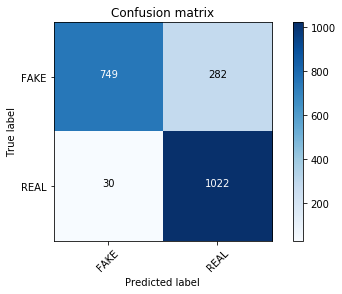

In [17]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Drawing Confusion Matrix With Bag Of Words (Count Vectorizer)

accuracy:   0.893
Confusion matrix, without normalization


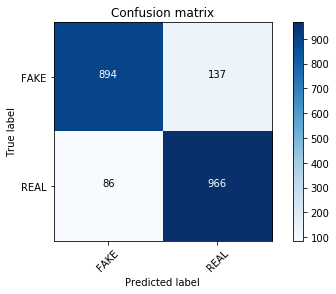

In [18]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Drawing Confusion Matrix With Passive Agressive Classifier

accuracy:   0.935
Confusion matrix, without normalization


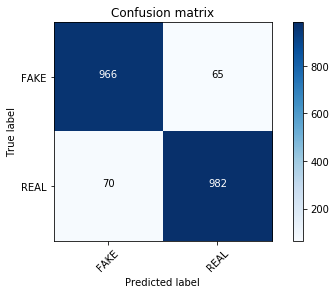

In [21]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [22]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)


FAKE -5.2884323682109535 2016
FAKE -4.8589258518836695 october
FAKE -3.8058662605411184 hillary
FAKE -3.223942024156888 source
FAKE -3.053183816569026 article
FAKE -2.9345708150873455 november
FAKE -2.5188645254258972 establishment
FAKE -2.4830917441707254 advertisement
FAKE -2.4314000760636 share
FAKE -2.368856617937903 election
FAKE -2.2842018934863395 podesta
FAKE -2.276759512628453 mosul
FAKE -2.206244967331806 photo
FAKE -2.1928055550950263 snip
FAKE -2.151168070787331 wikileaks
FAKE -2.043981091320435 corporate
FAKE -2.0316019142383808 print
FAKE -1.9828597720978567 oct
FAKE -1.971186877585513 donald
FAKE -1.8742667809138638 corruption
FAKE -1.855359164395492 26
FAKE -1.8335622428610014 ayotte
FAKE -1.809737684550226 sources
FAKE -1.800289897433052 email
FAKE -1.7936067819900918 fbi
FAKE -1.7498579678994046 28
FAKE -1.7442691766756857 just
FAKE -1.7355169857111186 uk
FAKE -1.689521131629728 elect
FAKE -1.6627237217473032 kelly

REAL 4.92290487921632 said
REAL 2.779968951095921 sa

In [23]:
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.475038166131624, 'said'),
 (-4.557755765696411, 'trump'),
 (-4.998512624800526, 'clinton'),
 (-5.4569276772387845, 'state'),
 (-5.490244119921227, 'people'),
 (-5.5363812138589275, 'president'),
 (-5.552332156632977, 'obama'),
 (-5.56354625250585, 'new'),
 (-5.611628563407297, 'campaign'),
 (-5.7053165044418, 'republican'),
 (-5.817111159963203, 'party'),
 (-5.942995527226684, 'states'),
 (-5.973348051818289, 'time'),
 (-5.992092369310043, 'like'),
 (-5.996934993785832, 'just'),
 (-6.049250783149993, 'sanders'),
 (-6.071665514674097, 'percent'),
 (-6.10265515699294, 'political'),
 (-6.108970017851615, 'house'),
 (-6.115780486854141, 'cruz')]

In [24]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-13.809717812363413, '000035'),
 (-13.809717812363413, '0002'),
 (-13.809717812363413, '000billion'),
 (-13.809717812363413, '0011'),
 (-13.809717812363413, '006s'),
 (-13.809717812363413, '007'),
 (-13.809717812363413, '007s'),
 (-13.809717812363413, '008s'),
 (-13.809717812363413, '00am'),
 (-13.809717812363413, '00p'),
 (-13.809717812363413, '00pm'),
 (-13.809717812363413, '014'),
 (-13.809717812363413, '015'),
 (-13.809717812363413, '02'),
 (-13.809717812363413, '020'),
 (-13.809717812363413, '023'),
 (-13.809717812363413, '02714'),
 (-13.809717812363413, '02870'),
 (-13.809717812363413, '02welcome'),
 (-13.809717812363413, '031')]

In [25]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))
for i in tokens_with_weights:
    print(i)
    break

('00', -11.411822539565042)
